In [ ]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.utils import resample
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve, roc_curve, auc

In [ ]:
X_train = pd.read_csv('/content/all_X_train.csv')
y_train = pd.read_csv('/content/All_Y_train.csv')

X_test = pd.read_csv('/content/All_X_test.csv')
y_test = pd.read_csv('/content/All_Y_test.csv')

In [ ]:
print(X_train.shape[0] == y_train.shape[0])

print(X_test.shape[0] == y_test.shape[0])

print(X_train.shape[1] == X_test.shape[1])

True
True
True


In [ ]:
X_train.shape

(2028, 25)

In [ ]:
flag = 1
for arr in X_train.columns == X_test.columns:
  if arr == False:
    print('False')
if flag ==1:
  print('True')

True


In [ ]:
X_train.head(3)

,220045,220179,220210,220277,223761,220293,224685,220224,220235,225625,...,intime,outtime,Age,gender,ethnicity,insurance,label,hadm_id,los,select_time
0,94.472222,98.312500,23.131944,87.986111,25.613889,0.000000,0.000000,0.000000,0.000000,0.233333,...,2138-07-31 10:38:39,2138-08-05 11:34:23,68,M,WHITE,Other,0,24113870,72,48
1,80.555556,96.222222,20.527778,105.986111,23.043056,0.000000,0.000000,0.000000,0.000000,0.341667,...,2144-12-02 00:57:43,2144-12-07 00:21:14,82,M,WHITE,Medicare,0,28605008,72,47
2,87.361111,84.430556,28.666667,94.277778,30.523611,1.055556,20.208333,2.666667,0.402778,0.316667,...,2182-12-06 01:33:09,2182-12-09 18:35:12,76,F,WHITE,Other,1,20574244,72,17


In [ ]:
X_train.columns.tolist()

['220045',
 '220179',
 '220210',
 '220277',
 '223761',
 '220293',
 '224685',
 '220224',
 '220235',
 '225625',
 '227457',
 '226540',
 '224639',
 'subject_id',
 'stay_id',
 'intime',
 'outtime',
 'Age',
 'gender',
 'ethnicity',
 'insurance',
 'label',
 'hadm_id',
 'los',
 'select_time']

In [ ]:
columns_to_keep_with_features = ['220045', '220277', '220210', '223761', '220179', 'Age', 'gender', 'ethnicity', 'insurance']
columns_to_keep_with_no_features = ['Age', 'gender', 'ethnicity', 'insurance']

X_train_with_features = X_train[columns_to_keep_with_features]
X_test_with_features = X_test[columns_to_keep_with_features]

X_train_with_no_features = X_train[columns_to_keep_with_no_features]
X_test_with_no_features = X_test[columns_to_keep_with_no_features]

In [ ]:
df_train_with_features = pd.concat([X_train_with_features, y_train], axis=1)
df_test_with_features = pd.concat([X_test_with_features, y_test], axis=1)

df_train_with_no_features = pd.concat([X_train_with_no_features, y_train], axis=1)
df_test_with_no_features = pd.concat([X_test_with_no_features, y_test], axis=1)

In [ ]:
df_train_with_features.head(3)

,220045,220277,220210,223761,220179,Age,gender,ethnicity,insurance,label
0,94.472222,87.986111,23.131944,25.613889,98.312500,68,M,WHITE,Other,0
1,80.555556,105.986111,20.527778,23.043056,96.222222,82,M,WHITE,Medicare,0
2,87.361111,94.277778,28.666667,30.523611,84.430556,76,F,WHITE,Other,1


In [ ]:
# print("Training Dataset")
# print(df_train_with_features['gender'].value_counts())
# print("")

# print(df_train_with_features['ethnicity'].value_counts())
# print("")

# print(df_train_with_features['insurance'].value_counts())

In [ ]:
# print("Testing Dataset")
# print(df_test_with_features['gender'].value_counts())
# print("")

# print(df_test_with_features['ethnicity'].value_counts())
# print("")

# print(df_test_with_features['insurance'].value_counts())

In [ ]:
elements_to_include = ['WHITE', 'BLACK/AFRICAN AMERICAN', 'OTHER', 'WHITE - OTHER EUROPEAN', 'WHITE - RUSSIAN', 'ASIAN']

df_train_with_features = df_train_with_features[df_train_with_features['ethnicity'].isin(elements_to_include)]
df_test_with_features = df_test_with_features[df_test_with_features['ethnicity'].isin(elements_to_include)]

df_train_with_no_features = df_train_with_no_features[df_train_with_no_features['ethnicity'].isin(elements_to_include)]
df_test_with_no_features = df_test_with_no_features[df_test_with_no_features['ethnicity'].isin(elements_to_include)]

In [ ]:
print(df_train_with_features['ethnicity'].value_counts())

WHITE                     1442
BLACK/AFRICAN AMERICAN     131
OTHER                       57
WHITE - OTHER EUROPEAN      27
WHITE - RUSSIAN             22
ASIAN                       18
Name: ethnicity, dtype: int64


In [ ]:
print(df_test_with_features['ethnicity'].value_counts())

WHITE                     355
BLACK/AFRICAN AMERICAN     37
WHITE - OTHER EUROPEAN      9
OTHER                       5
WHITE - RUSSIAN             5
ASIAN                       1
Name: ethnicity, dtype: int64


In [ ]:
print(df_train_with_features.isna().sum())
print("")
print(df_test_with_features.isna().sum())

220045       0
220277       0
220210       0
223761       0
220179       0
Age          0
gender       0
ethnicity    0
insurance    0
label        0
dtype: int64

220045       0
220277       0
220210       0
223761       0
220179       0
Age          0
gender       0
ethnicity    0
insurance    0
label        0
dtype: int64


In [ ]:
df_train_with_features['label'].value_counts()

0    1388
1     309
Name: label, dtype: int64

In [ ]:
df_test_with_features['label'].value_counts()

0    350
1     62
Name: label, dtype: int64

In [ ]:
df_majority_with_features = df_train_with_features[df_train_with_features['label'] == 0]
df_minority_with_features = df_train_with_features[df_train_with_features['label'] == 1]

df_majority_with_no_features = df_train_with_no_features[df_train_with_no_features['label'] == 0]
df_minority_with_no_features = df_train_with_no_features[df_train_with_no_features['label'] == 1]

In [ ]:
df_minority_oversampled_with_features = resample(df_minority_with_features, replace=True, n_samples=1000, random_state=42)

df_minority_oversampled_with_no_features = resample(df_minority_with_no_features, replace=True, n_samples=1000, random_state=42)

In [ ]:
df_oversampled_with_features = pd.concat([df_majority_with_features, df_minority_oversampled_with_features])

df_oversampled_with_no_features = pd.concat([df_majority_with_no_features, df_minority_oversampled_with_no_features])

In [ ]:
df_oversampled_with_features['label'].value_counts()

0    1388
1    1000
Name: label, dtype: int64

In [ ]:
train_sex_data = pd.get_dummies(df_oversampled_with_no_features['gender'], drop_first = True)
train_ethinicity_data = pd.get_dummies(df_oversampled_with_no_features['ethnicity'], drop_first = True)
train_insurance_data = pd.get_dummies(df_oversampled_with_no_features['insurance'], drop_first = True)

test_sex_data = pd.get_dummies(df_test_with_no_features['gender'], drop_first = True)
test_ethinicity_data = pd.get_dummies(df_test_with_no_features['ethnicity'], drop_first = True)
test_insurance_data = pd.get_dummies(df_test_with_no_features['insurance'], drop_first = True)

In [ ]:
df_oversampled_with_features = pd.concat([df_oversampled_with_features, train_sex_data, train_ethinicity_data, train_insurance_data], axis = 1)
df_oversampled_with_features.drop(['gender', 'ethnicity', 'insurance'], axis = 1, inplace = True)


df_test_with_features = pd.concat([df_test_with_features, test_sex_data, test_ethinicity_data, test_insurance_data], axis = 1)
df_test_with_features.drop(['gender', 'ethnicity', 'insurance'], axis = 1, inplace = True)



df_oversampled_with_no_features = pd.concat([df_oversampled_with_no_features, train_sex_data, train_ethinicity_data, train_insurance_data], axis = 1)
df_oversampled_with_no_features.drop(['gender', 'ethnicity', 'insurance'], axis = 1, inplace = True)

df_test_with_no_features = pd.concat([df_test_with_no_features, test_sex_data, test_ethinicity_data, test_insurance_data], axis = 1)
df_test_with_no_features.drop(['gender', 'ethnicity', 'insurance'], axis = 1, inplace = True)

In [ ]:
X_training_data_with_features = df_oversampled_with_features.drop(['label'], axis=1)
X_test_data_with_features = df_test_with_features.drop(['label'], axis=1)

y_training_data_with_features = df_oversampled_with_features[['label']]
y_test_data_with_features = df_test_with_features[['label']]



X_training_data_with_no_features = df_oversampled_with_no_features.drop(['label'], axis=1)
X_test_data_with_no_features = df_test_with_no_features.drop(['label'], axis=1)

y_training_data_with_no_features = df_oversampled_with_no_features[['label']]
y_test_data_with_no_features = df_test_with_no_features[['label']]

In [ ]:
X_training_data_with_features.shape

(2388, 14)

In [ ]:
y_training_data_with_features.shape

(2388, 1)

In [ ]:
model = LogisticRegression(max_iter=5000)

In [ ]:
model.fit(X_training_data_with_features, y_training_data_with_features.values.ravel())
predictions_with_features = model.predict(X_test_data_with_features)
print(classification_report(y_test_data_with_features, predictions_with_features))

              precision    recall  f1-score   support

           0       0.87      0.81      0.84       350
           1       0.22      0.31      0.26        62

    accuracy                           0.74       412
   macro avg       0.55      0.56      0.55       412
weighted avg       0.77      0.74      0.75       412



In [ ]:
model.fit(X_training_data_with_no_features, y_training_data_with_no_features.values.ravel())
predictions_with_no_features = model.predict(X_test_data_with_no_features)
print(classification_report(y_test_data_with_no_features, predictions_with_no_features))

              precision    recall  f1-score   support

           0       0.86      0.95      0.90       350
           1       0.32      0.13      0.18        62

    accuracy                           0.83       412
   macro avg       0.59      0.54      0.54       412
weighted avg       0.78      0.83      0.80       412



In [ ]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

In [ ]:
rf_model.fit(X_training_data_with_features, y_training_data_with_features.values.ravel())
predictions_with_features = rf_model.predict(X_test_data_with_features)
print(classification_report(y_test_data_with_features, predictions_with_features))

              precision    recall  f1-score   support

           0       0.85      0.98      0.91       350
           1       0.14      0.02      0.03        62

    accuracy                           0.84       412
   macro avg       0.50      0.50      0.47       412
weighted avg       0.74      0.84      0.78       412



In [ ]:
rf_model.fit(X_training_data_with_no_features, y_training_data_with_no_features.values.ravel())
predictions_with_no_features = rf_model.predict(X_test_data_with_no_features)
print(classification_report(y_test_data_with_no_features, predictions_with_no_features))

              precision    recall  f1-score   support

           0       0.86      0.74      0.79       350
           1       0.17      0.31      0.22        62

    accuracy                           0.67       412
   macro avg       0.51      0.52      0.51       412
weighted avg       0.75      0.67      0.71       412



In [ ]:
gb_model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)

In [ ]:
gb_model.fit(X_training_data_with_features, y_training_data_with_features.values.ravel())
predictions_with_features = gb_model.predict(X_test_data_with_features)
print(classification_report(y_test_data_with_features, predictions_with_features))

              precision    recall  f1-score   support

           0       0.86      0.84      0.85       350
           1       0.20      0.23      0.21        62

    accuracy                           0.75       412
   macro avg       0.53      0.53      0.53       412
weighted avg       0.76      0.75      0.76       412



In [ ]:
gb_model.fit(X_training_data_with_no_features, y_training_data_with_no_features.values.ravel())
predictions_with_no_features = gb_model.predict(X_test_data_with_no_features)
print(classification_report(y_test_data_with_no_features, predictions_with_no_features))

              precision    recall  f1-score   support

           0       0.86      0.83      0.84       350
           1       0.18      0.21      0.19        62

    accuracy                           0.73       412
   macro avg       0.52      0.52      0.52       412
weighted avg       0.75      0.73      0.74       412



In [ ]:
xgb_model = XGBClassifier()
xgb_model.fit(X_training_data_with_features, y_training_data_with_features.values.ravel())
predictions_xgb = xgb_model.predict(X_test_data_with_features)
print("XGBoost:")
print(classification_report(y_test_data_with_features, predictions_xgb))
print("=" * 50)

XGBoost:
              precision    recall  f1-score   support

           0       0.86      0.92      0.89       350
           1       0.24      0.15      0.18        62

    accuracy                           0.80       412
   macro avg       0.55      0.53      0.53       412
weighted avg       0.76      0.80      0.78       412



In [ ]:
xgb_model = XGBClassifier()
xgb_model.fit(X_training_data_with_no_features, y_training_data_with_no_features.values.ravel())
predictions_xgb = xgb_model.predict(X_test_data_with_no_features)
print("XGBoost:")
print(classification_report(y_test_data_with_no_features, predictions_xgb))
print("=" * 50)

XGBoost:
              precision    recall  f1-score   support

           0       0.85      0.73      0.79       350
           1       0.16      0.29      0.21        62

    accuracy                           0.66       412
   macro avg       0.51      0.51      0.50       412
weighted avg       0.75      0.66      0.70       412



In [ ]:
X_training_data_with_features.columns

Index(['220045', '220277', '220210', '223761', '220179', 'Age', 'M',
       'BLACK/AFRICAN AMERICAN', 'OTHER', 'WHITE', 'WHITE - OTHER EUROPEAN',
       'WHITE - RUSSIAN', 'Medicare', 'Other'],
      dtype='object')

In [ ]:
X_test_data_with_features.columns

Index(['220045', '220277', '220210', '223761', '220179', 'Age', 'M',
       'BLACK/AFRICAN AMERICAN', 'OTHER', 'WHITE', 'WHITE - OTHER EUROPEAN',
       'WHITE - RUSSIAN', 'Medicare', 'Other'],
      dtype='object')

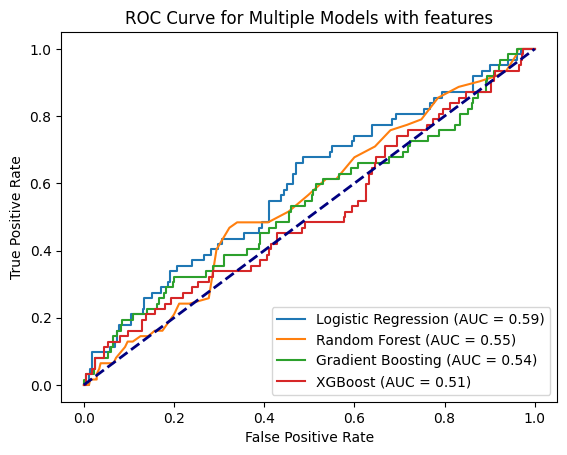

In [ ]:
# Assuming you have trained models named svm_model, rf_model, gb_model, nb_model, xgb_model
models = [model, rf_model, gb_model, xgb_model]
model_names = ['Logistic Regression', 'Random Forest', 'Gradient Boosting', 'XGBoost']

for model, name in zip(models, model_names):
    if hasattr(model, "decision_function"):
        y_scores = model.decision_function(X_test_data_with_features)
    else:
        y_scores = model.predict_proba(X_test_data_with_features)[:, 1]

    fpr, tpr, _ = roc_curve(y_test_data_with_features, y_scores)
    roc_auc = auc(fpr, tpr)

    plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Multiple Models with features')
plt.legend(loc='lower right')
plt.savefig('ROC Curve for Multiple Models with features.pdf')
plt.show()


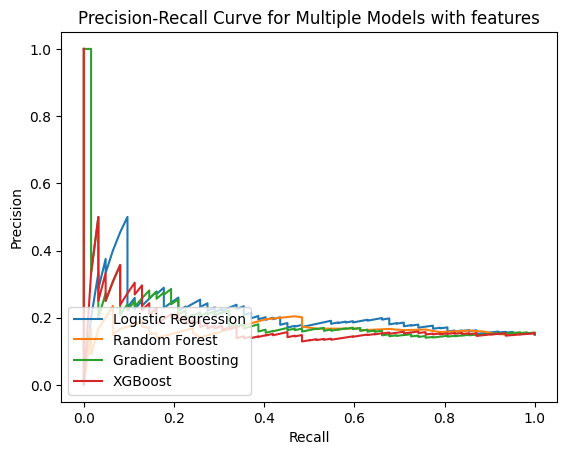

In [ ]:
for model, name in zip(models, model_names):
    if hasattr(model, "decision_function"):
        y_scores = model.decision_function(X_test_data_with_features)
    else:
        y_scores = model.predict_proba(X_test_data_with_features)[:, 1]

    precision, recall, _ = precision_recall_curve(y_test_data_with_features, y_scores)

    plt.plot(recall, precision, label=f'{name}')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve for Multiple Models with features')
plt.legend(loc='lower left')
plt.savefig('Precision-Recall Curve for Multiple Models with features.pdf')
plt.show()

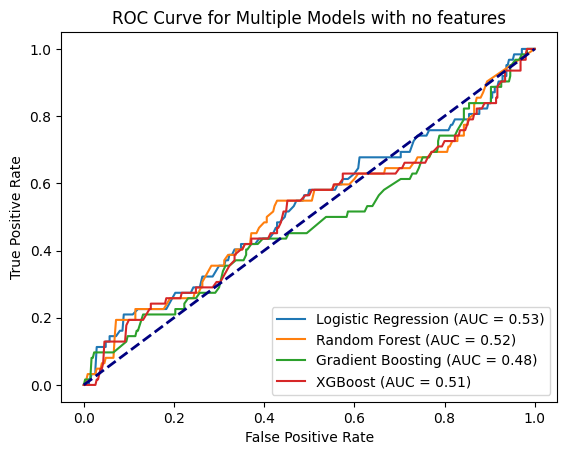

In [ ]:
# Assuming you have trained models named svm_model, rf_model, gb_model, nb_model, xgb_model
models = [model, rf_model, gb_model, xgb_model]
model_names = ['Logistic Regression', 'Random Forest', 'Gradient Boosting', 'XGBoost']

for model, name in zip(models, model_names):
    if hasattr(model, "decision_function"):
        y_scores = model.decision_function(X_test_data_with_no_features)
    else:
        y_scores = model.predict_proba(X_test_data_with_no_features)[:, 1]

    fpr, tpr, _ = roc_curve(y_test_data_with_no_features, y_scores)
    roc_auc = auc(fpr, tpr)

    plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Multiple Models with no features')
plt.legend(loc='lower right')
plt.savefig('ROC Curve for Multiple Models with no features.pdf')
plt.show()


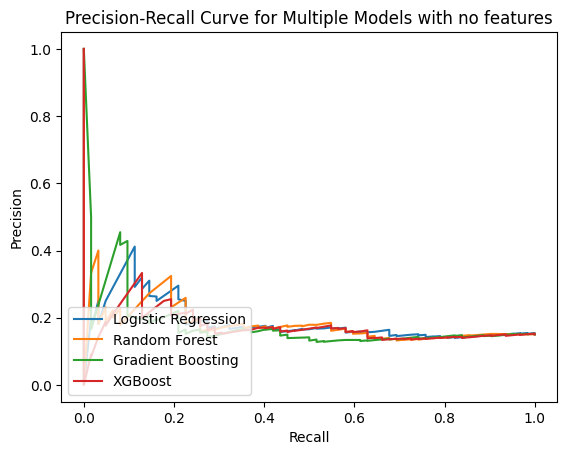

In [ ]:
for model, name in zip(models, model_names):
    if hasattr(model, "decision_function"):
        y_scores = model.decision_function(X_test_data_with_no_features)
    else:
        y_scores = model.predict_proba(X_test_data_with_no_features)[:, 1]

    precision, recall, _ = precision_recall_curve(y_test_data_with_no_features, y_scores)

    plt.plot(recall, precision, label=f'{name}')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve for Multiple Models with no features')
plt.legend(loc='lower left')
plt.savefig('Precision-Recall Curve for Multiple Models with no features.pdf')
plt.show()